In [118]:
!pip install yfinance

In [119]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


import yfinance as yf
%matplotlib inline

In [120]:
### Datos BTC-USD


#define the ticker symbol
tickerSymbol = 'BTC-USD'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2021-1-25')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2021-01-20,36050.113281,36378.328125,33570.476562,35547.750000,66834573161,0,0
2021-01-21,35549.398438,35552.679688,30250.750000,30825.699219,75643067688,0,0
2021-01-22,30817.625000,33811.851562,28953.373047,33005.761719,77207272511,0,0


In [121]:
### Datos Nasdaq


#define the ticker symbol
tickerSymbol = '^IXIC'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerNQ = tickerData.history(period='1d', start='2010-1-1', end='2021-1-25')

#see your data
tickerNQ

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,2292.919922,2293.590088,2269.110107,2269.149902,1237820000,0,0
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,1931380000,0,0
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2367860000,0,0
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2253340000,0,0
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2270050000,0,0
...,...,...,...,...,...,...,...
2021-01-15,13099.900391,13139.830078,12949.759766,12998.500000,6402970000,0,0
2021-01-19,13132.730469,13206.860352,13078.700195,13197.179688,6229100000,0,0
2021-01-20,13342.549805,13486.129883,13329.769531,13457.250000,6771630000,0,0


#### Grafico de correlacion precios Nasdaq y BTC-USD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


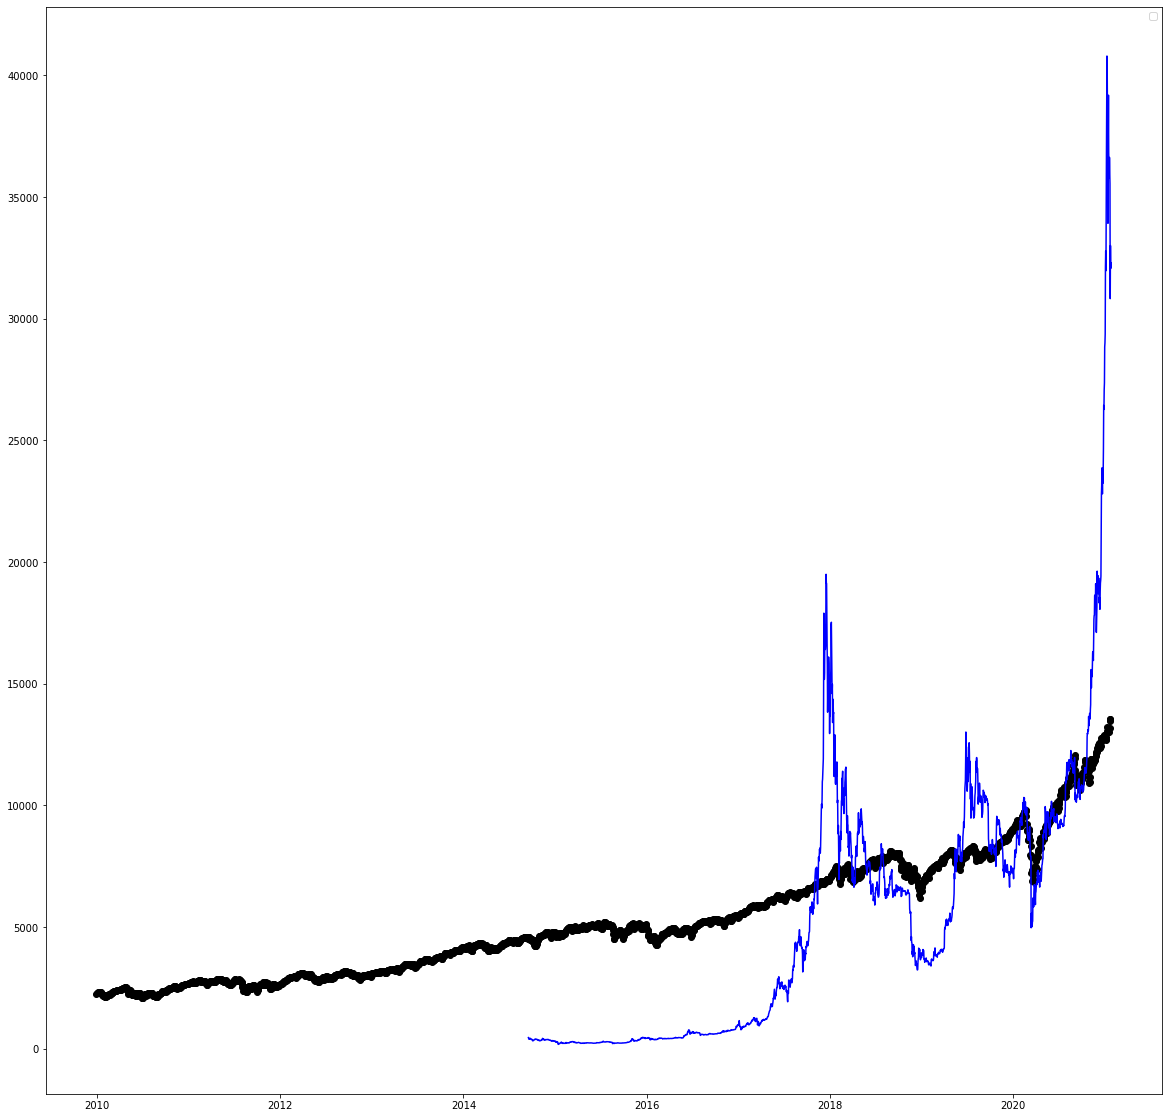

In [122]:
plt.subplots(figsize=(20,20))

plt.plot(tickerNQ.index, tickerNQ.Close,'-ok')
plt.plot(tickerDf.index, tickerDf.Close,color='blue')
plt.legend();

##### Reseteamos indices para que el indice DATE pase a ser columna y poder hacer el merge

In [123]:
tickerNQ=tickerNQ.reset_index()
tickerBTC=tickerBTC.reset_index()

ValueError: cannot insert level_0, already exists

In [125]:

tickerNQ.columns=['Date','Open_N',	'High_N',	'Low_N','Close_N',	'Volume_N',	'Dividends_N',	'Stock_Splits_N']


tickerDf.columns=['Date','Open_B',	'High_B',	'Low_B','Close_B',	'Volume_B',	'Dividends_B',	'Stock_Splits_B']
tickerBTC=tickerDf


ValueError: Length mismatch: Expected axis has 7 elements, new values have 8 elements

In [126]:
dataset= pd.concat([tickerNQ, tickerBTC])
dataset=dataset.groupby(dataset.index)
pd.merge(tickerBTC,tickerNQ)

,level_0,index,Date,Open_B,High_B,Low_B,Close_B,Volume_B,Dividends_B,Stock_Splits_B,Open_N,High_N,Low_N,Close_N,Volume_N,Dividends_N,Stock_Splits_N
0,0,0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,4553.959961,4582.399902,4539.359863,4562.189941,1796710000,0,0
1,1,1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,4575.740234,4593.979980,4572.620117,4593.430176,1774840000,0,0
2,2,2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,4606.129883,4610.569824,4563.439941,4579.790039,3178490000,0,0
3,5,5,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,0,0,4568.450195,4568.870117,4513.120117,4527.689941,1881520000,0,0
4,6,6,2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500,0,0,4511.319824,4536.029785,4508.419922,4508.689941,1847730000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,2312,2312,2021-01-15,39156.707031,39577.710938,34659.589844,36825.367188,67760757881,0,0,13099.900391,13139.830078,12949.759766,12998.500000,6402970000,0,0
1595,2316,2316,2021-01-19,36642.234375,37755.890625,36069.804688,36069.804688,57244195486,0,0,13132.730469,13206.860352,13078.700195,13197.179688,6229100000,0,0
1596,2317,2317,2021-01-20,36050.113281,36378.328125,33570.476562,35547.750000,66834573161,0,0,13342.549805,13486.129883,13329.769531,13457.250000,6771630000,0,0
1597,2318,2318,2021-01-21,35549.398438,35552.679688,30250.750000,30825.699219,75643067688,0,0,13521.480469,13560.349609,13454.070312,13530.910156,7183390000,0,0
